In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

## Generating my dataset
My equation of the dataset is:
$$
y = 0.8x^2 + 0.9x + 2
$$

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

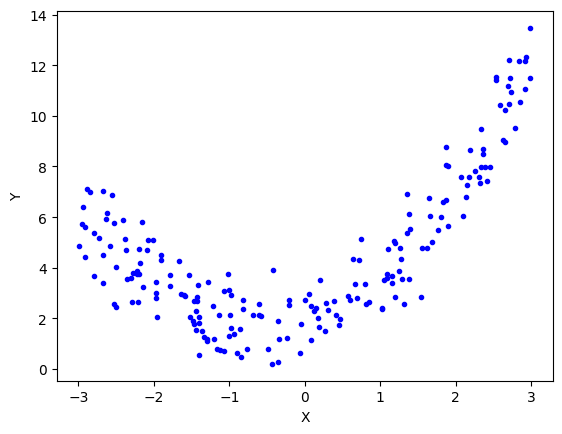

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [5]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  0.31245429050204365


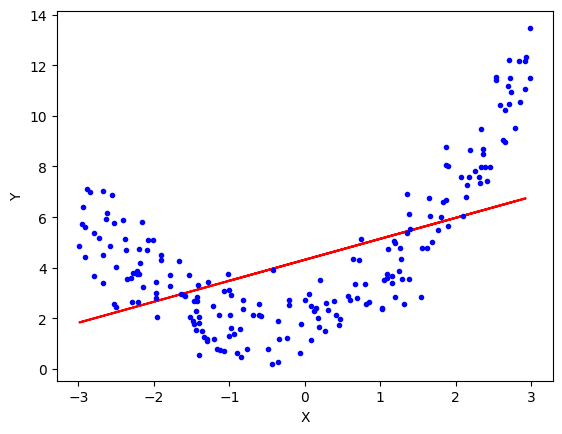

In [6]:
plt.plot(X_train, linreg.predict(X_train), color = 'r')
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Applying the Polynomial Linear Regression

$$
degree = 2
$$

In [8]:
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [9]:
print(X_train[0])
print(X_train_poly[0])

[-0.99489381]
[ 1.         -0.99489381  0.98981369]


#### Including bias parameter

In [10]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  0.8969856277291696


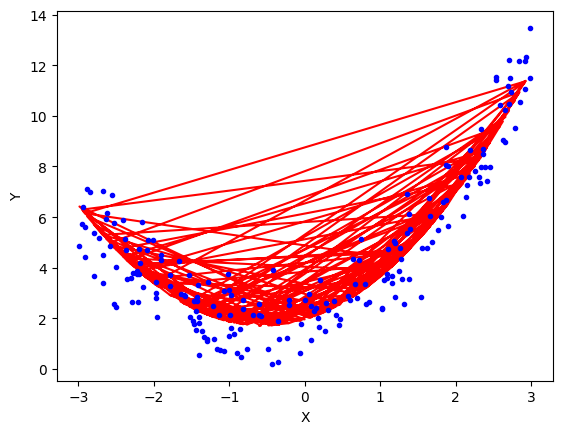

In [11]:
plt.plot(X_train, lr.predict(X_train_poly), color = 'r')
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [12]:
print("Coefficients: ", lr.coef_)
print()
print("Intercept: ", lr.intercept_)

Coefficients:  [[0.         0.88735549 0.79681751]]

Intercept:  [1.96013047]


In [13]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

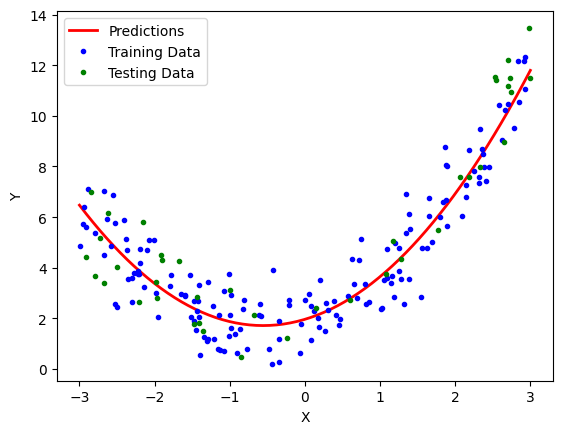

In [14]:
plt.plot(X_new, y_new, 'r-', linewidth = 2, label = "Predictions")
plt.plot(X_train, y_train, 'b.', label = "Training Data")
plt.plot(X_test, y_test, 'g.', label = "Testing Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Custom Polynomial Regression Function

In [18]:
def polynomial_regression(degree):
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree = degree, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, 'r', label = "Degree" + str(degree), linewidth = 2)
    plt.plot(X_train, y_train, 'b.', linewidth = 3)
    plt.plot(X_test, y_test, 'g.', linewidth = 3)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-3, 3, 0, 10])
    plt.legend(loc = "upper left")
    plt.show()

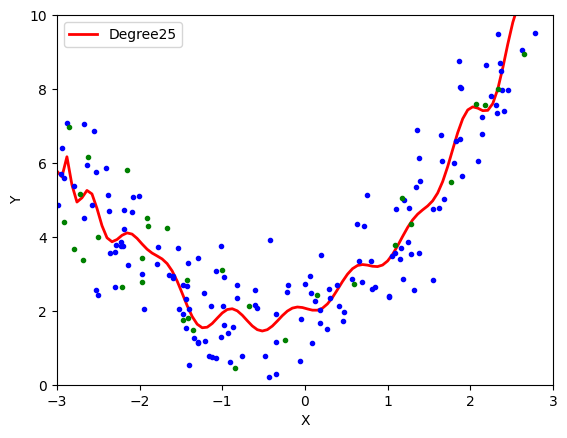

In [26]:
polynomial_regression(degree = 25)